In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
# import locale
import glob
import sys
import os
import requests
import tarfile

import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


inspired by:
* https://gist.github.com/zacstewart/5978000
* https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/doc2vec-IMDB.ipynb

data description:
* http://ai.stanford.edu/~amaas/data/sentiment/

In [3]:
from helper import collect_reviews

In [4]:
all_reviews_file = "../data/all_reviews.tab"

if not os.path.isfile(all_reviews_file):
    "if no summary file found, collect reviews from separate files:"
    alldata = collect_reviews(datadirname = "../data/")
    alldatadf = pd.DataFrame(alldata,
                 columns = ("dataset", "judgement", "internal_id", "stars", "review" )
                )
    alldatadf.index.name = "id"
    alldatadf.to_csv(all_reviews_file, sep="\t")
    alldatadf["stars"] = alldatadf["stars"].astype(int)
    alldatadf["internal_id"] = alldatadf["internal_id"].astype(int)
else:
    "read summary file"
    alldatadf = pd.read_table(all_reviews_file, index_col=[0])

In [5]:
# !rm ../data/all_reviews.tab

_OK, now we are ready to play with our table!_

In [6]:
alldatadf[:5]

,dataset,judgement,internal_id,stars,review
id,,,,,
0,train,pos,0,9,bromwell high is a cartoon comedy . it ran at...
1,train,pos,10000,8,homelessness ( or houselessness as george car...
2,train,pos,10001,10,brilliant over-acting by lesley ann warren . ...
3,train,pos,10002,7,this is easily the most underrated film inn th...
4,train,pos,10003,8,this is not the typical mel brooks film . it ...


# Explore pandas data classes:
    pd.DataFrame
    pd.Series

**`DataFrame`** object `df` has 2 dimensions:

+    rows indexed by `df.index`
+    columns indexed by `df.columns`

both belong to on of special classes `Index`, `Int64Index`, or `MultiIndex`

index classes have properties `name` and `names` (which is useful for `MultiIndex`)

sometimes it is useful to obtain index values as a list (`.tolist()`) or matrix (`.get_values()`)

**`Series`** objects are one-dimensional (single column), and has only `.index` property, no `.columns`

In [7]:
alldatadf.columns

Index(['dataset', 'judgement', 'internal_id', 'stars', 'review'], dtype='object')

In [8]:
alldatadf.index.names

FrozenList(['id'])

Each column (or row) of `pd.DataFrame` can be extracted as an object of `pd.Series` class

Usually you will need to extract a column, unless your whole DataFrame columns are of the same type

## Changing index

You can pop-up index to a new column by calling

    df.reset_index()
    
Or other way around, move regular columns to the index:

    df.set_index("col_name")
    
    df.set_index(["col_name"])
    
    df.set_index(["col1", "col2", "col3"])  # creates hierarchical MultiIndex

In [110]:
"create multi-index reflecting initial folder structure"
["dataset","judgement","internal_id"]

['dataset', 'judgement', 'internal_id']

## Subsetting columns

call

    df["col"]
    df.loc[:, "col"]
    
    df[["col","col2","col3"]]
    
    df.iloc[:, :3]  # first three columns

In [111]:
"task: get 'review' columns as a Series "
#review = 

"task: get 'review' columns as a Series "

## Subsetting rows

might be confusing for DataFrame

There are N ways to do it.

First, using `df[]` is very ambigous.
When used **with ranges**, such as `df[:4]`, `df[-5:]` it will subset first 4 or last 5 rows respectively. _Otherwise (with integers or strings) it will look for a column, not row!_, i.e. `df[4]` will look for column named `4`.

If you need to get a row **by name**: use

    df.loc["rowname"]

If you need to get a bunch of rows **by boolean mask**: use 
    
    df.loc[mask]

If you need to get a row **by ordinal number**: use 

    df.iloc[42]

In [112]:
"""set hierarchical index (folder structure) 
and take 'train' and 'pos' subsets """

"set hierarchical index (folder structure) \nand take 'train' and 'pos' subsets "

## Explore pandas functionality:

### `pd.Series` only
    .map
    .sort_values()
    .value_counts() # for categorical data
    
### `pd.DataFrame` only

    .T    #  transpose
    .apply()     # one operation to whole row(axis=1)  or column(axis=0)
    .applymap()  # an operation to each cell
    .groupby().agg()   # ... key(s)
    .corr() # useful for all-numeric data frames

## Generic

these methods accept `axis=` argument for DataFrame
    
    .all()
    .any()
    
    .hist()
    .median()
    .mean()  # <- do not run them on the full alldatadf data frame, as it contains text
    .var()
    .sum()

In [ ]:
# count values

In [113]:
# applymap(type)
#.dtypes

In [114]:
"take a Series and a one-column DataFrame"
"[] Series"
"[[]] DataFrame"
"type"

'[]DataFrame'

In [115]:
"calculate review length, log-length"

'calculate review length, log-length'

In [117]:
"groupby and take mean and variance, summarize"

'groupby and take mean and variance, summarize'

In [118]:
"""take mean of two last columns 
"review_len","review_log_len"
(it will freak out on text data if you ask it for the whole table)"""

'take mean of two last columns \n"review_len","review_log_len"\n(it will freak out on text data if you ask it for the whole table)'

In [120]:
"for an arbitrary function: .apply(fun)"

'for an arbitrary function: .apply(fun)'

In [122]:
"plot a histogram"
#    hist(by = [], figsize = (6,12),
#         sharey=True, normed=True)

'plot a histogram'

## Iterating through a data frame

data frames have property

    df.iterrows() # for rows
    
and

    df.items()    # for columns

you probably will need the former more often. And don't forget about `.apply`

# `sklearn`

A things to remember if you have to leave right now:

 + most scikit-learn classes must have two methods:
    
    + `.fit()`
    + `.predict()`
    
 + instead of the latter, preprocessing tools often have:
    + `.transform()`

## Fit linear regression using `sklearn`

In [123]:
from sklearn import linear_model
# linear_model.LinearRegression()
# .score
# .coef_

In [124]:
#plot a scatter plot with trend

In [125]:
"check which reviews contain 'good' and 'bad' and both"

"check which reviews contain 'good' and 'bad' and both"

In [126]:
"count number of stars in the data set and plot a histogram; try excluding unsupervised subset"

'count number of stars in the data set'

In [127]:
"count number of reviews in train/test  pos/neg using groupby"

'count number of reviews in train/test  pos/neg using groupby'

In [128]:
"calculate mean stars per subset (train/test, pos/neg)"
"calculate mean stars per subset (train/test)"

'calculate mean stars per subset'

In [35]:
"remove unsupervised data points from the dataset completely"

In [129]:
"replace textual judgement label with a binary/boolean label: 'pos' -> True"

"replace textual judgement label with a binary/boolean label: 'pos' -> True"

In [130]:
"create a dataframe of train_data"

'create a dataframe of train_data'

## Run simple analysis with `sklearn`

In [131]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from nltk.tokenize import TreebankWordTokenizer
from sklearn.utils import shuffle

ngram_size = 3
vectorizer = TfidfVectorizer(ngram_range=(1, ngram_size), min_df = .1, stop_words='english')
# tokenizer=TreebankWordTokenizer().tokenize)

classifier_pipeline = Pipeline([
    ('count_vectorizer',   vectorizer),
    ('classifier',         MultinomialNB()),
])

**visualize ngram matrix**

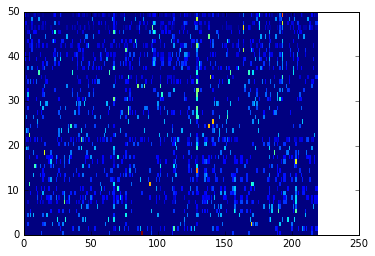

In [39]:
ngrams = vectorizer.fit_transform(train_data[:50].review.as_matrix())
plt.pcolor(np.asarray(ngrams.todense()))
pass

In [132]:
"shuffle and subset the data"

'shuffle and subset the data'

## Estimate performance of the classifier model

In [134]:
from sklearn import cross_validation
cross_validation.cross_val_score
# scoring="roc_auc"
# scoring="accuracy"

<function sklearn.cross_validation.cross_val_score>

## Fit model on the whole data set and inspect the weights

## confusion matrix

In [138]:
# from sklearn import metrics
# labels = [True, False]
# yhat = classifier_pipeline.predict(X)
# confmatr = pd.DataFrame(
#     metrics.confusion_matrix(yhat, y, labels=labels),
#     index = labels,
#     columns = labels
#     )
# confmatr.index.name = "predicted"
# confmatr.columns.name = "observed"
# confmatr

In [140]:
"calculate confusion matrix manually"
# confmatr = pd.DataFrame({"yhat":yhat, 
#                          "y": y,
#                          "count":1}).groupby(["y", "yhat"]).agg(sum)
# confmatr

'calculate confusion matrix manually'

In [137]:
"try out `pd.pivot_table`"

'try out `pd.pivot_table`'

In [141]:
"pull out the steps of the pipeline"
# cntv = classifier_pipeline.get_params()["count_vectorizer"]
# cl = classifier_pipeline.get_params()["classifier"]
# model_analysis = pd.DataFrame({"coef": cl.coef_[0]}, index=cntv.get_feature_names()) 
# model_analysis[-5:]

'pull out the steps of the pipeline'

In [142]:
# model_analysis["voc"] =  [cntv.vocabulary_[kk] for kk in model_analysis.index.tolist()]

# ntop = 10
# pd.DataFrame({
#             "negative": model_analysis["coef"].sort_values()[:ntop].index,
#             "positive": model_analysis["coef"].sort_values()[-ntop:].index
#              })

## Fit an elastic net regression model

$$
\mathrm{loss} = (y - b \cdot x)^2
$$


$$
\mathrm{loss} = (y - b_j \cdot x_j)^2 + \alpha_2 \sum  b_j^2 + \alpha_1 |\sum b_j|
$$

In [76]:
from sklearn.linear_model import ElasticNetCV

In [143]:
"build a pipeline"

'build a pipeline'

In [62]:
"fit; get predicted values"
"plot observed ~ predicted"

In [145]:
"calculate cross-validation R^2"

'calculate cross-validation R^2'

## Fit a bunch of classifiers and compare their performance
adapted from http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html

In [103]:
# split into a training set and a test set
num_points = 1000

xraw_train, y_train = shuffle( alldatadf.set_index("dataset").loc["train"]["review"],
                              alldatadf.set_index("dataset").loc["train"]["positive_judgement"])
xraw_train = xraw_train[:num_points]
y_train = y_train[:num_points]

y_train = alldatadf.set_index("dataset").loc["train"]["positive_judgement"]
y_test = alldatadf.set_index("dataset").loc["test"]["positive_judgement"]

xraw_train = alldatadf.set_index("dataset").loc["train"]["review"]
xraw_test = alldatadf.set_index("dataset").loc["test"]["review"]

Extracting features from the training data using a sparse vectorizer
n_samples: 25000, n_features: 74536

Extracting features from the test data using the same vectorizer
done in 4.751129s at 7.034MB/s
n_samples: 25000, n_features: 74536

Extracting 20 best features by a chi-squared test
done in 0.096809s

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.034s
test time:  0.001s
accuracy:   0.763
dimensionality: 20
density: 1.000000

classification report:
             precision    recall  f1-score   support

      False       0.82      0.67      0.74     12500
       True       0.72      0.86      0.78     12500

avg / total       0.77      0.76      0.76     25000

confusion matrix:
[[ 8361  4139]
 [ 1785 10715]]

Perceptron
___________________

/Users/dlituiev/repos/scikit-learn/sklearn/linear_model/ridge.py:306: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


train time: 0.086s
test time:  0.001s
accuracy:   0.730
dimensionality: 20
density: 1.000000

classification report:
             precision    recall  f1-score   support

      False       0.87      0.54      0.67     12500
       True       0.67      0.92      0.77     12500

avg / total       0.77      0.73      0.72     25000

confusion matrix:
[[ 6742  5758]
 [  996 11504]]

Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(C=1.0, class_weight=None, fit_intercept=True,
              loss='hinge', n_iter=50, n_jobs=1, random_state=None,
              shuffle=True, verbose=0, warm_start=False)
train time: 0.081s
test time:  0.001s
accuracy:   0.765
dimensionality: 20
density: 1.000000

classification report:
             precision    recall  f1-score   support

      False       0.81      0.70      0.75     12500
       True       0.73      0.83      0.78     12500

avg / total       0.77      0.

/Users/dlituiev/repos/scikit-learn/sklearn/svm/classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


train time: 0.181s
test time:  0.001s
accuracy:   0.765
dimensionality: 20
density: 1.000000

classification report:
             precision    recall  f1-score   support

      False       0.82      0.68      0.74     12500
       True       0.73      0.85      0.78     12500

avg / total       0.77      0.76      0.76     25000

confusion matrix:
[[ 8478  4022]
 [ 1864 10636]]

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=50, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
train time: 0.140s
test time:  0.000s
accuracy:   0.741
dimensionality: 20
density: 1.000000

classification report:
             precision    recall  f1-score   support

      False       0.87      0.57      0.69     12500
     

/Users/dlituiev/repos/scikit-learn/sklearn/svm/classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


train time: 0.101s
test time:  0.001s
accuracy:   0.742
dimensionality: 20
density: 1.000000

classification report:
             precision    recall  f1-score   support

      False       0.87      0.57      0.69     12500
       True       0.68      0.91      0.78     12500

avg / total       0.77      0.74      0.73     25000

confusion matrix:
[[ 7158  5342]
 [ 1110 11390]]

NearestCentroid (aka Rocchio classifier)
________________________________________________________________________________
Training: 
NearestCentroid(metric='euclidean', shrink_threshold=None)
train time: 0.008s
test time:  0.004s
accuracy:   0.753
classification report:
             precision    recall  f1-score   support

      False       0.83      0.63      0.72     12500
       True       0.70      0.87      0.78     12500

avg / total       0.77      0.75      0.75     25000

confusion matrix:
[[ 7931  4569]
 [ 1598 10902]]

Naive Bayes
______________________________________________________________________

/Users/dlituiev/repos/scikit-learn/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/dlituiev/repos/scikit-learn/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


train time: 0.089s
test time:  0.004s
accuracy:   0.765
classification report:
             precision    recall  f1-score   support

      False       0.82      0.68      0.74     12500
       True       0.73      0.85      0.78     12500

avg / total       0.77      0.76      0.76     25000

confusion matrix:
[[ 8478  4022]
 [ 1864 10636]]



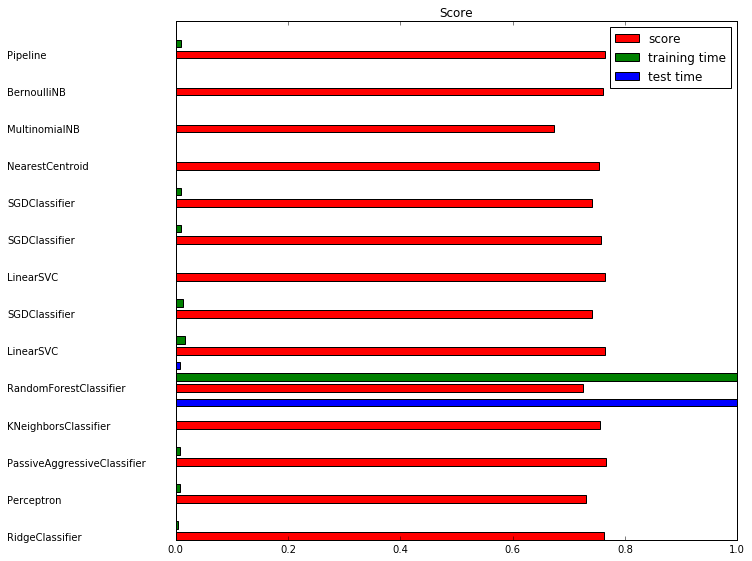

In [105]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics


categories = [True, False]
def size_mb(docs):
    return sum(len(s.encode('utf-8')) for s in docs) / 1e6

data_train_size_mb = size_mb(xraw_train)
data_test_size_mb = size_mb(xraw_test)

from time import time
print("Extracting features from the training data using a sparse vectorizer")
t0 = time()
use_hashing=False
n_features = 2 ** 16
select_chi2 = 20
print_top10 = False
print_report = True
print_cm = True
if use_hashing:
    vectorizer = HashingVectorizer(stop_words='english', non_negative=True,
                                   n_features=n_features)
else:
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    
X_train = vectorizer.fit_transform(xraw_train)
duration = time() - t0
# print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)
print()

print("Extracting features from the test data using the same vectorizer")
t0 = time()
X_test = vectorizer.transform(xraw_test)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_test_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_test.shape)
print()

# mapping from integer feature name to original token string
if use_hashing:
    feature_names = None
else:
    feature_names = vectorizer.get_feature_names()

if select_chi2:
    print("Extracting %d best features by a chi-squared test" %
          select_chi2)
    t0 = time()
    ch2 = SelectKBest(chi2, k=select_chi2)
    X_train = ch2.fit_transform(X_train, y_train)
    X_test = ch2.transform(X_test)
    if feature_names:
        # keep selected feature names
        feature_names = [feature_names[i] for i
                         in ch2.get_support(indices=True)]
    print("done in %fs" % (time() - t0))
    print()

if feature_names:
    feature_names = np.asarray(feature_names)


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."


###############################################################################
# Benchmark classifiers
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, category in enumerate(clf.classes_):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s"
                      % (category, " ".join(feature_names[top10]))))
        print()

    if print_report:
        print("classification report:")
        print(metrics.classification_report(y_test, pred,
                                            target_names=["%s" % x for x in clf.classes_]))

    if print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        (Perceptron(n_iter=50), "Perceptron"),
        (PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(loss='l2', penalty=penalty,
                                            dual=False, tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', LinearSVC(penalty="l1", dual=False, tol=1e-3)),
  ('classification', LinearSVC())
])))

# make some plots

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='r')
plt.barh(indices + .3, training_time, .2, label="training time", color='g')
plt.barh(indices + .6, test_time, .2, label="test time", color='b')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()